
# TASK 2 : Prediction using Unsupervised ML

## OBJECTIVE : From 'Iris' dataset predict the optimum number of clusters and represent it  visually.
### Creator: Sanket Chavan

### Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.max_columns', None)

In [2]:
file_path = 'Iris.csv'
df = pd.read_csv(file_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


--------

### A little exploration of the dataset

In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
## getting the info about every numerical column except the id column
df.iloc[:, 1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking for null values

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Let's find out how many flowers of each species are there in the dataset

In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Defining a function for plotting graphs

* Plotting graphs will tell us how the attributes changes as per the species

* The function will take the attribute as an argument and return a graph

In [7]:
def plotter(attr):
    plt.figure(figsize = (7,5), dpi = 100)
    plt.title(attr)
    sns.barplot(x = 'Species',
                y = attr, 
                data = df,
                palette = 'hls');

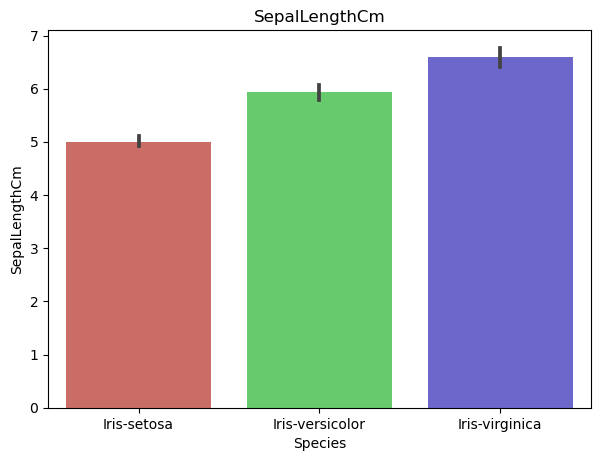

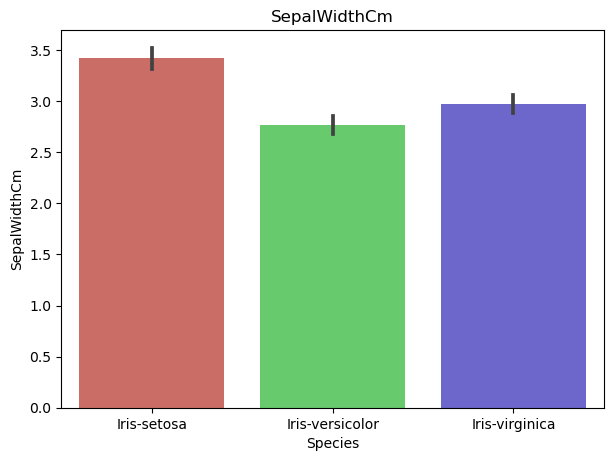

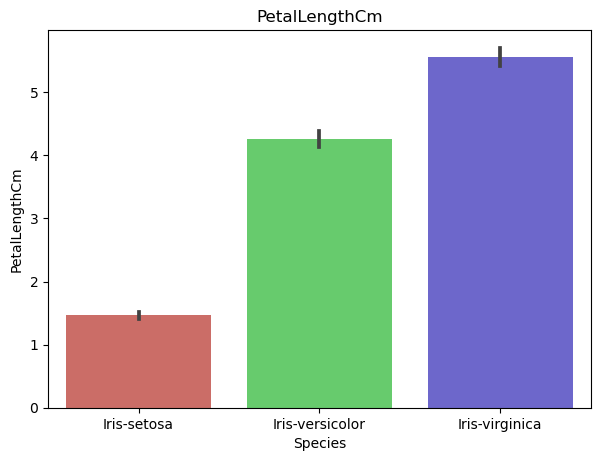

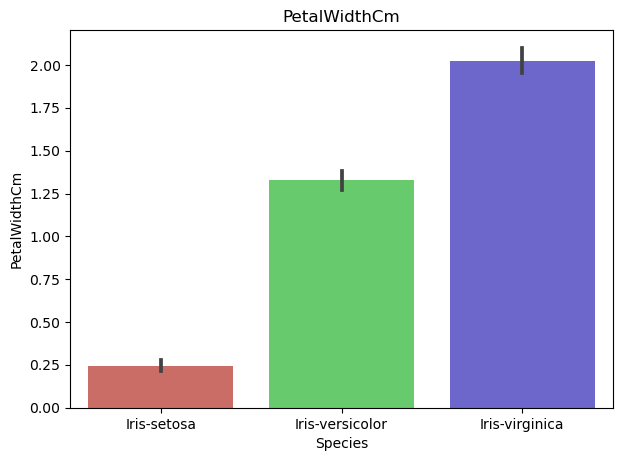

In [8]:
for col in df.columns[1:-1]:
    plotter(col)

---

### Model building
**we will be using the KMeans clustering algorithm from `sklearn.cluster`

In [9]:
x = df.iloc[:, [0, 1, 2, 3]].values
y = df.iloc[:, -1]

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++',
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [11]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

---

### Visualising the clusters

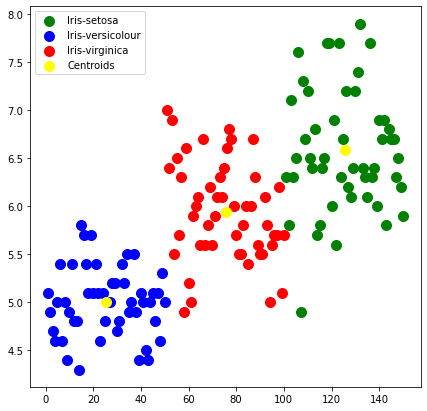

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();



## ***Thank you so much***